# Optimization with PyTorch

PyTorch contains all one needs for function optimization. In fact, it will do a _better_ job than what you can do yourself, in particular thanks to it's extremely efficient evaluation of gradients, which is performed by backpropagation, i.e. by an adjoint method/approach.

## Contents

1. [1D Function minimization by hand](#simple)
2. [1D Function minimization with PyTorch optimizers](#simple-pytorch)


## PyTorch Procedure for Optimization

To use PyTorch for optimizing a function, we use the following steps:

Here are the usual steps to minimize a function, $f(x)$:

1. Define the function f(x).
2. Initialize the parameters of the function.
3. Choose an optimizer.
4. Iterate over the following steps:
     - Calculate the gradient of f(x) with respect to the parameters.
     - Update the parameters using the optimizer.
     - Check if the stopping criteria have been met.
5. If the stopping criteria have not been met, go to step 4.

However, with  PyTorch we have direct access to the gradient of the function $f(x).$ Using this gradient we can easily write an efficient, gradient descent algorithm by using:

- A `backward()` step that calculates the gradient of the loss function with respect to the parameters, by backpropagation, as explained in the Lectures. 
- A `step()` step that updates the parameters using the optimizer.

The `backward()` step is called after the loss function is evaluated. The loss function is a measure of how well the model is performing. The gradient of the loss function with respect to the parameters tells us how we can change the parameters to improve the performance of the model.

The `step()` step updates the parameters using the optimizer. The optimizer is a algorithm that updates the parameters in a way that minimizes the loss function. The learning rate is a hyperparameter that controls how much the parameters are updated in each step.

In the code example, we call the `backward()` step after the loss function is evaluated. We then call the `step()` step to update the parameters.


There are many additional resources available:

* PyTorch documentation on autograd: https://pytorch.org/docs/stable/autograd.html
* PyTorch documentation on optimizers: https://pytorch.org/docs/stable/optim.html
* A gentle introduction to PyTorch: https://pytorch.org/tutorials/beginner/basics/intro.html
* A more advanced tutorial on PyTorch: https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html


## Simple function estimation $y=f(x)$ <a class="anchor" id="simple"></a>

In the following, we minimize a simple quadratic function of one variable,

$$ y = x^2,$$

with the simplest gradient descent algorithm. That is, find

$$ \min_{x \in \mathbb{R}} \| f \|_1 $$

by the iteration

$$ x^{(k+1)} = x^{(k)} - \lambda \nabla_x f(x^{(k)}) , \quad k=0,1,\ldots , $$

where 

- $\lambda$ is the so-called learning rate (step size), and 
- $\nabla$ is the gradient operator (first derivative).

We will also animate the optimization progress, at the end.

## Optimize by coding explicitly

Here, we code explicitly the steepest descent algorithm - below we will use a built-in optimizer.
When implementing the above using PyTorch's `autograd`, please keep in mind following points:

- The gradient information $\nabla_x f(x)$ will be stored in `x.grad` once we run the backward function.
- The gradient is accumulated by default, so we need to clear `x.grad` after each iteration.
- We need to use with `torch.no_grad()` since we want to change `x` in place but do not want ` autograd` to track this change.

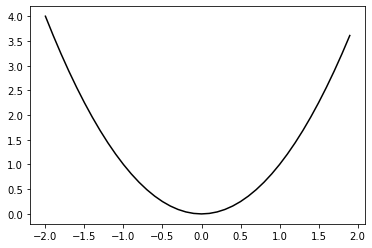

tensor([6.250])
tensor([4.])
tensor([2.560])
tensor([1.638])
tensor([1.049])
tensor([0.671])
tensor([0.429])
tensor([0.275])
tensor([0.176])
tensor([0.113])
tensor([0.072])
tensor([0.046])
tensor([0.030])
tensor([0.019])
tensor([0.012])
tensor([0.008])
tensor([0.005])
tensor([0.003])
tensor([0.002])
tensor([0.001])
tensor([0.001])
tensor([0.001])
tensor([0.000])
tensor([0.000])
tensor([0.000])
tensor([8.920e-05])
tensor([5.709e-05])
tensor([3.654e-05])
tensor([2.338e-05])
tensor([1.497e-05])
tensor([9.578e-06])
tensor([6.130e-06])
tensor([3.923e-06])
tensor([2.511e-06])
tensor([1.607e-06])
tensor([1.028e-06])
tensor([6.582e-07])
tensor([4.212e-07])
tensor([2.696e-07])
tensor([1.725e-07])


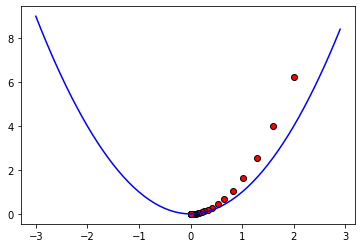

In [4]:
import torch
import matplotlib.pyplot as plt
import numpy as np

torch.set_printoptions(precision=3)
from live_plot import anim_2d

def f(x):
    return x ** 2

# plot the function
x = np.arange(-2,2,0.1)
y = f(x)
plt.plot(x, y, '-k')
plt.show()

# initialize the optimization
x0 = 2.5  # intital value 
lr = 0.1  # learning rate
iterations = 40  
points= []

x_range = torch.arange(-3, 3, 0.1)
x = torch.Tensor([x0]).requires_grad_()

for i in range(iterations):
    y = f(x)
    loss = y.abs()   # evaluate the objective fct (L1 loss)
    loss.backward()  # compute gradient of loss by backprop (will be stored in x.grad)
    with torch.no_grad():
       x -= lr * x.grad   # update x
       x.grad.zero_()     # clear the gradient
    points += [(x.item(), y.item())]
    print(y.data) # Uncomment this to see the output of the function i.e. y
# display the animation
anim_2d(x_range, f, points, 400)

#### Why do we use `with torch.no_grad()` ?
Because `x` "requires grad", any operation we apply to `x` is recorded for automatic differentiation. 
As we do not want to track the update step of the parameters, we need to "tell" autograd not to track this change. This is done by using the `torch.no_grad()` context.

## Use of built-in optimizers <a class="anchor" id="simple-pytorch"></a>

- PyTorch provides the most common optimization algorithms encapsulated into "optimizer classes".
- An optimizer is an object that automatically loops through all the numerous parameters of your model and performs the (potentially complex) update step for you.

We first need to import `torch.optim`.

Below are the most commonly used optimizers. Each of them has its specific parameters and default values that can be checked in the Pytorch [documentation](https://pytorch.org/docs/master/optim.html#algorithms).

In [ ]:
import torch.optim as optim

parameters = [x]  # This should be the list of model parameters

# choose one of the following (you should try each one!)

#optimizer = optim.SGD(parameters, lr=0.01, momentum=0.9)
#optimizer = optim.Adam(parameters, lr=0.01)
#optimizer = optim.Adadelta(parameters, lr=0.01)
#optimizer = optim.Adagrad(parameters, lr=0.01)
#optimizer = optim.RMSprop(parameters, lr=0.01)
#optimizer = optim.LBFGS(parameters, lr=0.01)

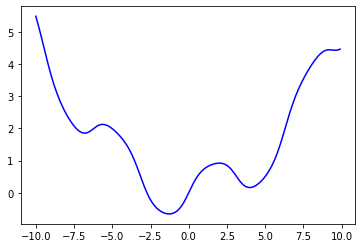

In [6]:
# define a new function
def func_2d(x):
    return x ** 2 / 20 + x.sin().tanh()

# plot
xx = np.arange(-10,10,0.1)
####y = func_2d(x)
plt.plot(xx,  xx ** 2 / 20 + np.tanh(np.sin(xx)), '-b')
plt.show()

We will need the 2 new functions described above:

- `optimizer.zero_grad()` : This function sets the gradient of the parameters ($x$ here) to 0 (otherwise it will get accumulated)
- `optimizer.step()` : This function applies an update step


tensor([-0.275])


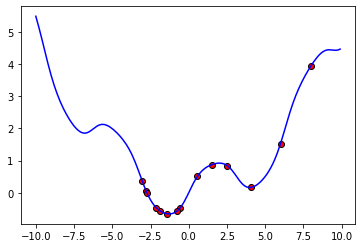

In [8]:
# initialize the optimization
x0 = 8
lr = 2
iterations = 15
points= []

x_range = torch.arange(-10, 10, 0.1)
x = torch.Tensor([x0]).requires_grad_()

# Let's use Adam 
optimizer = torch.optim.Adam([x], lr=lr)

for i in range(iterations):
    optimizer.zero_grad() #prevent gradient accumulation
    f = func_2d(x)
    f.backward()     # compute gradient by backprop(agation)
    points += [(x.item(), f.item())]
    optimizer.step() # take one optimization step

print(f.data) # minimal function value
anim_2d(x_range, func_2d, points, 400)

tensor([3.372])


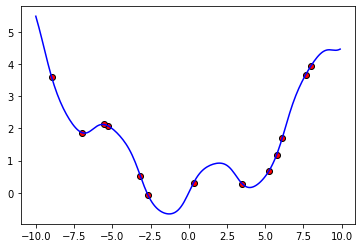

In [9]:
# initialize the optimization
x0 = 8
lr = 2
iterations = 40
points= []

x_range = torch.arange(-10, 10, 0.1)
x = torch.Tensor([x0]).requires_grad_()

# Let's use LBFGS 
optimizer = torch.optim.LBFGS([x], lr=lr)

for i in range(iterations):
    optimizer.zero_grad() #prevent gradient accumulation
    f = func_2d(x)
    f.backward()     # compute gradient by backpropagation
    points += [(x.item(), f.item())]
    # need a closure here -> lambda function
    optimizer.step(lambda: func_2d(x)) # take one optimization step

print(f.data) # minimal function value
anim_2d(x_range, func_2d, points, 400)

## Notes

1. This is an example where LBFGS does not work well. ADAM is much better here.
2. Further tuning of the learning rate and the number of iterations is needed.
3. In addition to the optimizer, a learning rate scheduler can be used to adjust the learning rate during training by reducing it according to a pre-defined schedule.